In [47]:
import numpy as np
import xlwings as xw
import pandas as pd

path = 'C:/Users/pc/Desktop/4_B.xlsx'
path2 = "renamed_" + path

while True:
    try:
        df = pd.read_excel(path, engine='openpyxl')
    except Exception as e:
        print("Failed to open workbook; error: ")
        print(e)
        wingsbook = xw.Book(path)
        wingsapp = xw.apps.active
        wingsbook.save(path2)
        wingsapp.quit()

        path = path2
    else:
        break

#for col in df.columns:
#    print(col)

B=df.values
# 여기까지가 판다스로 데이터를 받은 다음 넘파이 어레이로 변환하는 과정

In [30]:
import numpy as np

# 각도값이 음수인 부분 각도맞추기
B1d=360-B[:,0]*340/5
B1 = B1d*np.pi/180
B2d=360-B[:,1]*340/5
B2 = B2d*np.pi/180
B3d=360-B[:,2]*340/5
B3 = B3d*np.pi/180

# 각도값이 양수인 부분 각도맞추기
B4d=B[:,3]*340/5
B5d=B[:,4]*340/5
B6d=B[:,5]*340/5
B4 = B4d*np.pi/180
B5 = B5d*np.pi/180
B6 = B6d*np.pi/180

# 테이블로 합치는 부분은 판다스를 알아보기

In [66]:
i=len(B1)
C=np.zeros((320, 4))

b=np.array([[0], [0], [0], [1]])
a = np.arange(4).reshape(4,1)

    
for k in range(320):
    a6=B6[k]
    L1=np.array([[1, 0, 0, 0],
                 [0, np.cos(a6), -np.sin(a6), 33*np.cos(a6)],
                 [0, np.sin(a6), np.cos(a6), 33*np.sin(a6)],
                 [0, 0, 0, 1]])
    
    a5=B5[k]
    L2=np.array([[np.cos(a5), 0, np.sin(a5), 205*np.sin(a5)],
                 [0, 1, 0, 0],
                 [-np.sin(a5), 0, np.cos(a5), 205*np.cos(a5)],
                 [0, 0, 0, 1]])
    
    a4=B4[k]
    L3=np.array([[np.cos(a4), 0, np.sin(a4), 200*np.sin(a4)],
                 [0, 1, 0, 0],
                 [-np.sin(a4), 0, np.cos(a4), 200*np.cos(a4)],
                 [0, 0, 0, 1]])
    a3=B3[k]
    L4=np.array([[np.cos(a3), 0, np.sin(a3), 20*np.sin(a3)],
                 [0, 1, 0, 30],
                 [-np.sin(a3), 0, np.cos(a3), 20*np.cos(a3)],
                 [0, 0, 0, 1]])
    # 마찬가지로 6번째 링크는 5항을 늘어뜨려 계산한다
    a2=B2[k]
    L5=np.array([[np.cos(a2), -np.sin(a2), 0, 190*np.cos(a2)],
                 [np.sin(a2), np.cos(a2), 0, 190*np.sin(a2)],
                 [0, 0, 1, 45],
                 [0, 0, 0, 1]])
    
    d=L1@L2@L3@L4@L5@b
    d = d.squeeze()
    C[k]=d
    
# 스퀴즈를 안하면, 3배 더 크게 결과값이 나오므로, 3배를 나눠주어야 한다.

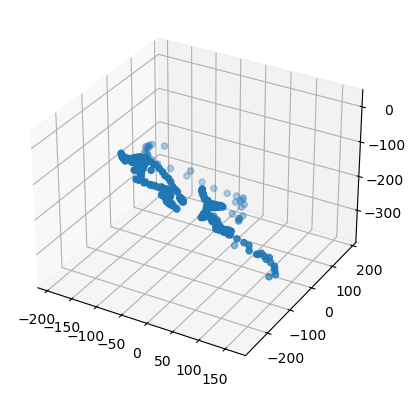

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import bokeh as bk

x=C[:,0]
y=C[:,1]
z=C[:,2]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x, y, z)
plt.show()